In [ ]:
import networkx as nx
import random
import numpy as np
import matplotlib.pyplot as plt

# List 6

Read the description of the q-voter model with independence in Mapping
the q-voter model: From a single chain to complex networks by Jędrzejewski et al (https://arxiv.org/abs/1501.05091):

### Implement the model with NN influence group.

NN - four randomly chosen nearest neighbors of the target spinson are in the
group. This method was used in the original q-voter model

We calculate magnetization of the network with given parameters.
Where:
* g - type of a graph structure
* p - probability of spinson's independence
* q - number of neighbors asked for opinion
* opinions - list of spinsons' opinions

In [ ]:
def spinson_action(g, p, q, opinions):
    nodes = list(g.nodes())
    nodes_nr = len(nodes)
    spinson = random.choice(nodes) 
    
    if random.random()<p: 
        if random.random()<0.5: 
            opinions[spinson] = -opinions[spinson] 
    else: 
        if len(list(g.neighbors(spinson)))<q:
            q_panel = list(g.neighbors(spinson)) 
        else:
            q_panel = random.sample(list(g.neighbors(spinson)), k=q) 
        q_opinions = [opinions[j] for j in q_panel] 
        q_first = int(q_opinions[0])
        if len(set(q_opinions)) == 1: 
            opinions[spinson] = q_first 
            
    magnetization = sum(opinions)/nodes_nr
    
    return magnetization

1. Choose at random one spinson Si
located at site i.
2. Decide with probability p, if the spinson will act independently.
3. In case of independence, a spinson flips to the opposite state with probability 1/2.
4. In other case (conformity), choose q neighbors of site i (a so called q-panel):
(a) If all the q neighbors are in the same state, i.e. q-panel is unanimous, the
spinson takes the state of the q neighbors.
(b) Otherwise, i.e. if q-panel is not unanimous, spinson flips with probability q.


### Simulate the model with N = 100 agents, q = 3 and 4, and the independence factor p ranging from 0.0 to 0.5 with step 0.02. Use the following networks as the underlying topology of social interactions: complete graph, BA(100,4), WS(100,4,0.01), WS(100,4,0.2). Finish the simulations after 1000 Monte Carlo steps.

### For each parameter set calculate the magnetization in the system as a function of time, averaged over 100 independent runs.


We use given networks:

In [ ]:
def graph(g, N):
    if g == 'CT':
        return nx.complete_graph(N)
    elif g == 'BA':
        return nx.barabasi_albert_graph(N, 4)
    elif g == 'WS1':
        return nx.watts_strogatz_graph(N, 4, 0.01)
    elif g == 'WS2':
        return nx.watts_strogatz_graph(N, 4, 0.2)

We want know magnetization after every Monte Carlo step, so we ask every spinson about their opinion one time and repeat it MC times for the given graph.
Where:
* N - number of spinsons
* MC - number of Monte Carlo steps
    

In [ ]:
def repeat(g, p, q, N, MC):
    G = graph(g,N)
    opinions = np.ones(N) 
    time = list([1]) 
    
    for m in range(MC-1):
        for _ in range(N): 
            end_mc_step = spinson_action(G,p,q,opinions)   
        time.append(end_mc_step)
        
    return time

To get the average magnetization for steps number of steps and final magnetization after MC Monte Carlo steps, we perform steps number of independent runs and calculate average magnetization for every Monte Carlo step and  average final magnetization after MC Monte Carlo steps.Where:
* steps - number of independent runs


In [ ]:
def independent_runs(g, p, q, N, MC, steps):
    result = np.zeros(MC)
    final_magn = []
    
    for _ in range(steps):
        step = repeat(g, p, q, N, MC)
        final_magn.append(step[-1])
        result = result + step
    avg_magnetization = result/steps
    final_magn = sum(final_magn)/steps
    
    return avg_magnetization, final_magn

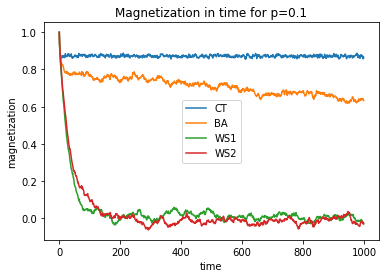

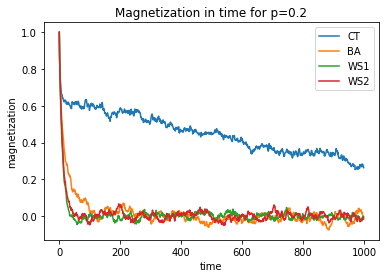

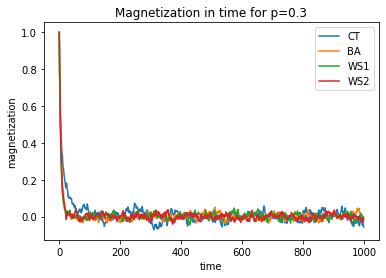

In [ ]:
probabilities = [0.1, 0.2, 0.3]
q =  4
N = 100
MC =  1000
steps = 100

for p in probabilities:
  ct, _ = independent_runs('CT', p, q, N, MC, steps)
  ba, _ = independent_runs('BA', p,q, N, MC, steps)
  ws1, _ = independent_runs('WS1', p, q, N, MC, steps)
  ws2, _ = independent_runs('WS2', p, q, N, MC, steps)

  plt.plot(ct)
  plt.plot(ba)
  plt.plot(ws1)
  plt.plot(ws2)
  plt.xlabel('time')
  plt.ylabel('magnetization')
  plt.legend(['CT', 'BA', 'WS1', 'WS2'])
  plt.title(f'Magnetization in time for p={p}')
  plt.show()

As we can observe for larger  p  we obtain magnetization close to 0 which coresponds to unanimious opinion in the network. Tends to lack of polarized opinion are graphs with  p  for graph equal to  0.1 . By going futher with probability of independence, the next graph goes to magnetization equal to  0 . At the point  p=0.3  all networks very easily becomes not unanimious.